<a href="https://colab.research.google.com/github/champsleague/ComputerVision/blob/main/CV_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


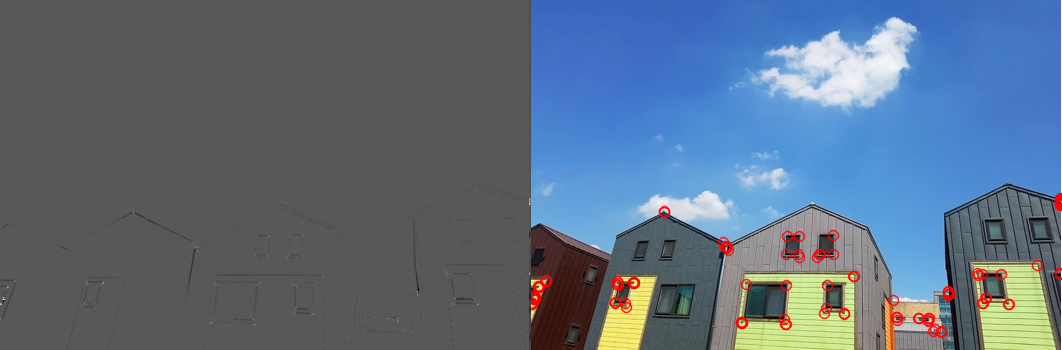

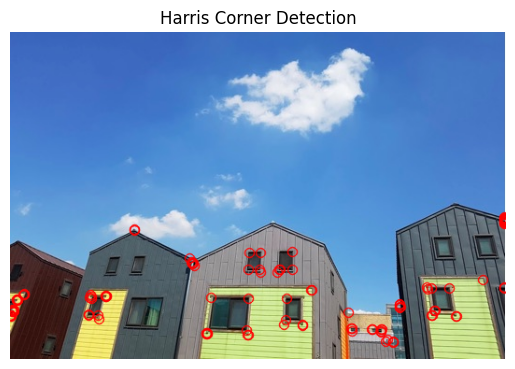

In [24]:
# [Lab 3-1] Harris Corner Detection

from google.colab import drive 
drive.mount('/content/gdrive')

# Mounted at /content/gdrive

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np 
import matplotlib.pylab as plt

img = cv.imread("house.jpg") 
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 1.해리스 코너 검출  
corner = cv.cornerHarris (gray, 2, 3, 0.04)

# 2.변화량 결과의 최대값 10% 이상의 좌표 구하기 
coord = np.where(corner > 0.1 * corner.max())
coord= np.stack((coord[1], coord[0]), axis=-1)

# 3.코너 좌표에 그리미 그리기

for x, y in coord:
  cv.circle(img, (x,y), 5, (0,0,255), 1, cv.LINE_AA)

# 4.변화량을 영상으로 표현하기 위해서 0~255로 정규화 
corner_norm = cv.normalize(corner, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

# 화면에 출력 (OpenCV)
corner_norm = cv.cvtColor(corner_norm, cv.COLOR_GRAY2BGR)
merged = np.hstack ((corner_norm, img))

cv2_imshow(merged)
cv.waitKey() 
cv.destroyAllWindows()

# 화면에 출력 (matplot) 
b, g, r = cv.split(img)   # img 파일을 b,g,r로 분리
img_RGB = cv.merge([r, g, b])
plt.imshow(img_RGB) 
plt.axis("off")
plt.title("Harris Corner Detection")
plt.show()

Keypoint :  413 descriptor :  (413, 128)
[[  1.   1.   1. ...   0.   0.   1.]
 [  8.  24.   0. ...   1.   0.   4.]
 [  0.   0.   0. ...   0.   0.   2.]
 ...
 [  1.   8.  71. ...  73. 127.   3.]
 [ 35.   2.   7. ...   0.   0.   9.]
 [ 36.  34.   3. ...   0.   0.   1.]]


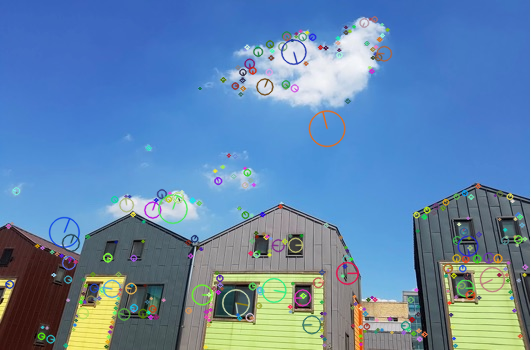

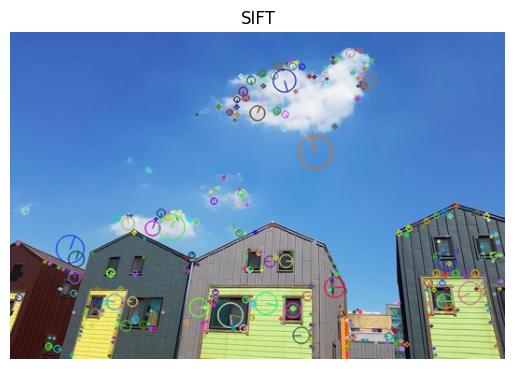

In [41]:
# [Lab 3-2] SIFT

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np 
import matplotlib.pylab as plt

img = cv.imread("house.jpg") 
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# SIFT 추출기 생성
sift = cv.xfeatures2d.SIFT_create()

# 키포인트 검출과 서술자 계산
keypoints, descriptor = sift.detectAndCompute(gray, None)
print('Keypoint : ', len(keypoints), 'descriptor : ', descriptor.shape)
print(descriptor)

# 키 포인트 그리기
img_draw = cv.drawKeypoints(img, keypoints,None, \
                            flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 출력
cv2_imshow(img_draw)
cv.waitKey() 
cv.destroyAllWindows()

# 화면에 출력 (matplot) 
b, g, r = cv.split(img_draw)   # img 파일을 b,g,r로 분리
img_RGB = cv.merge([r, g, b])
plt.imshow(img_RGB) 
plt.axis("off")
plt.title("SIFT")
plt.show()

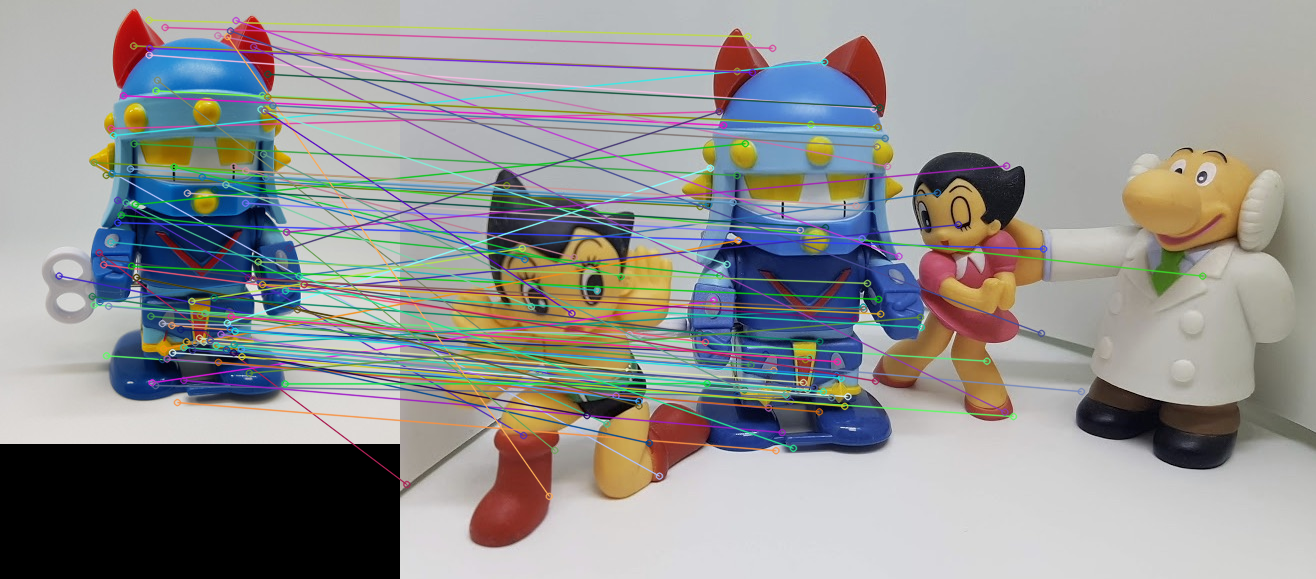

In [45]:
# [Lab 3-2] SIFT

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np 
 
img1 = cv.imread("taekwonv1.jpg") 
img2 = cv.imread("figures.jpg") 
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

# 1.SIFT 서술자 추출기 생성
detector = cv.xfeatures2d.SIFT_create()

# 2.각 영상에 대해 키 포인트와 서술자 추출
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# 3.BFMatcher 생성, L1 거리, 상호 체크
matcher = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

# 4.매칭계산
matches = matcher.match(desc1, desc2)

# 5.매칭 결과 그리기
res = cv.drawMatches(img1, kp1, img2, kp2, matches, None, \
                     flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
cv2_imshow(res)
cv.waitKey() 
cv.destroyAllWindows()

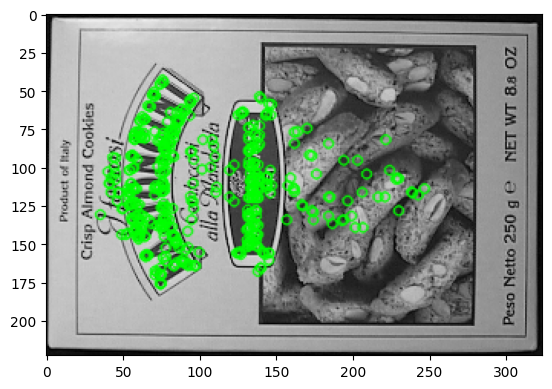

(<matplotlib.image.AxesImage at 0x7f8a7dbd3fa0>, None)

In [49]:
# [Lab 3-3] ORB

import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv.imread("box.png") 

# Initiative ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img, None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location, not size and orientation
img = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img), plt.show()

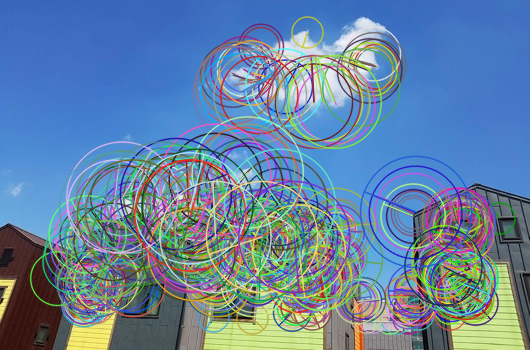

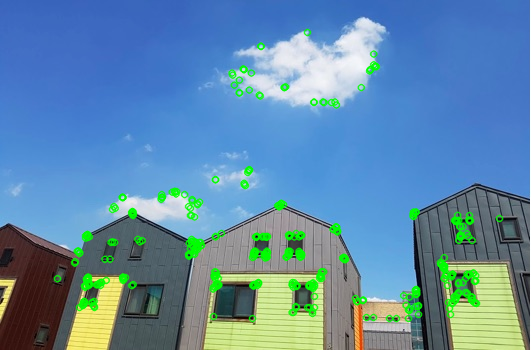

In [55]:
# [Lab 3-3] ORB feature detector

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("house.jpg") 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
keypoints, descriptor = orb.detectAndCompute(img, None)

# draw keypoints
img_draw = cv.drawKeypoints(img, keypoints, None, \
                            flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_draw2 = cv.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)

# 결과 출력
cv2_imshow(img_draw)
cv2_imshow(img_draw2)
cv.waitKey()
cv.destroyAllWindows()